In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Problema 1

In [3]:
def canales ():
    try:
        # Función solicita nombre de imagen y su ruta (si no existe en la misma ubicación) y parámetro color que indica canales a devolver
        imagen=input("Ingrese el nombre de la imagen: ")
    
        color = int(input("""
        Ingrese el número de su elección:
        1 = canal azul
        2 = canal verde
        3 = canal rojo
        10 = canales rojo y verde
        20 = canales verde y azul
        30 = canales rojo y azul
        """))
        # Se lee la imagen ingresada y se convierte de BGR a RGB para procesamiento, también se craga imagen de salida de prueba
        img=cv2.imread(imagen)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_salida=np.zeros_like(img)
        # Ciclo for para desarmar imagen en sus canales
        for i in range (0, img.shape[0]):
            for j in range(0, img.shape[1]):
                pixel=img[i,j]
                            
                red=pixel[0]
                green=pixel[1]
                blue=pixel [2]
    
                # Condicionales de acuerdo con el valor escogido de color para selección de canales definidos
                
                if color == 1:
                    img_salida[i,j]=[blue,0,0]
                elif color == 2:
                    img_salida[i,j]=[0,green,0]
                elif color == 3:
                    img_salida[i,j]=[0,0,red]
                elif color == 10:
                    img_salida[i,j]=[0,green,red]
                elif color == 20:
                    img_salida[i,j]=[blue,green,0]
                elif color == 30:
                    img_salida[i,j]=[blue,0,red]
                         
                else: 
                    print("Ingreso inválido para color, por favor seleccione una de las opciones brindadas.")
                    return
    
        # Escritura, transformación y visualización de imagen
        cv2.imwrite("salida.jpg",img_salida)
        salida=cv2.imread("salida.jpg")
        salida=cv2.cvtColor(salida,cv2.COLOR_BGR2RGB)
        plt.imshow(salida)
        plt.show()
    # Try/Except para indicar errores de ingreso.
    except: 
        print ("Valores ingresados no son correctos, por favor verificar.")

Ingrese el nombre de la imagen:  imagen.jpg

        Ingrese el número de su elección:
        1 = canal azul
        2 = canal verde
        3 = canal rojo
        10 = canales rojo y verde
        20 = canales verde y azul
        30 = canales rojo y azul
         10


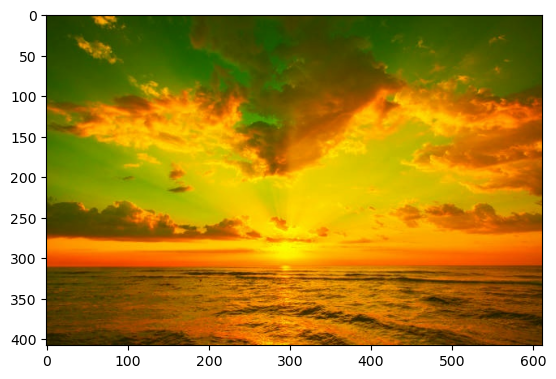

In [7]:
canales()

### Problema 2

In [9]:
def grises(img_R,img_G,img_B) :

  imgR = cv2.imread(img_R, cv2.IMREAD_GRAYSCALE)
  imgG = cv2.imread(img_G, cv2.IMREAD_GRAYSCALE)
  imgB = cv2.imread(img_B, cv2.IMREAD_GRAYSCALE)

  img = np.dstack((imgR,imgG,imgB))

  return plt.imshow(img)

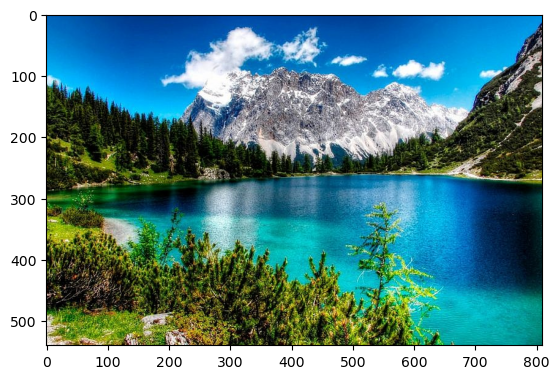

In [11]:
grises("imagen1_salida_gray_rojo.jpg","imagen1_salida_gray_verde.jpg","imagen1_salida_gray_azul.jpg")

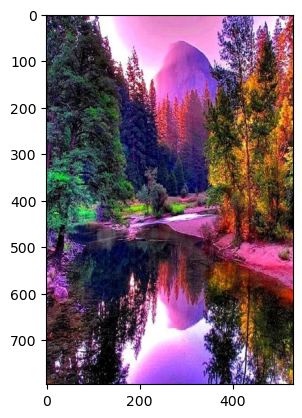

In [13]:
grises("imagen2_salida_gray_rojo.jpg","imagen2_salida_gray_verde.jpg","imagen2_salida_gray_azul.jpg")

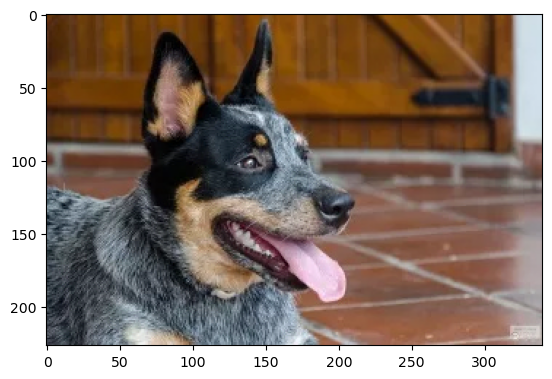

In [17]:
grises("perro_salida_gray_rojo.jpg","perro_salida_gray_verde.jpg","perro_salida_gray_azul.jpg")

### Problema 3

In [52]:
def colorAgris(img):
    imgC = cv2.imread(img)
    
    grisB = imgC[:, :, 0]
    grisG = imgC[:, :, 1]
    grisR = imgC[:, :, 2]
    
    cv2.imwrite("gris_azul.jpg", grisB)
    cv2.imwrite("gris_verde.jpg", grisG)
    cv2.imwrite("gris_rojo.jpg", grisR)
    
    salida_azul = cv2.imread("gris_azul.jpg")
    salida_verde = cv2.imread("gris_verde.jpg")
    salida_rojo = cv2.imread("gris_rojo.jpg")

    def imprimir (salida):

        for i, (data) in enumerate(salida):
              plt.figure()
              plt.imshow(data)
        plt.show()
        
    
    salidas = ([salida_azul,salida_verde,salida_rojo])
    imprimir(salidas)

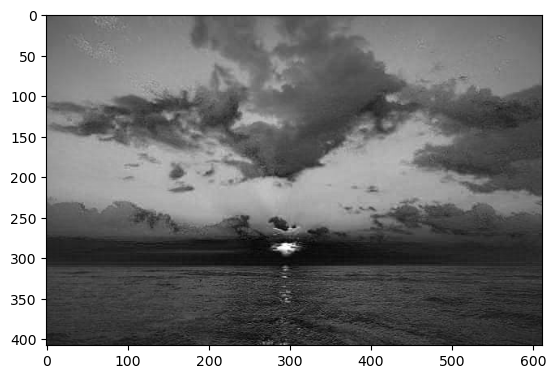

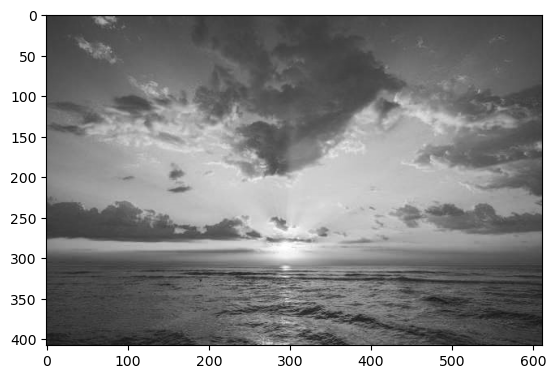

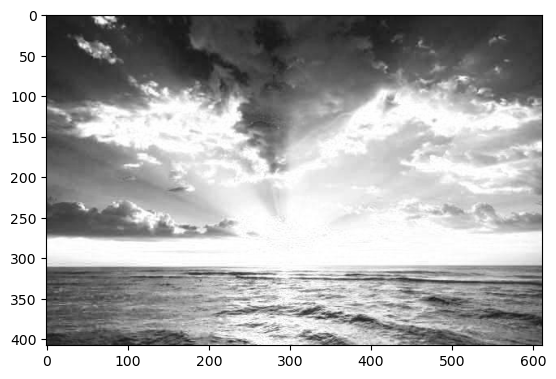

In [54]:
colorAgris("imagen.jpg")

### Problema 4

In [56]:
def histogramas(imagen):

    img = cv2.imread(imagen)
    canalB = img[:, :, 0]
    canalG = img[:, :, 1]
    canalR = img[:, :, 2]
    gris = np.uint8(np.mean(np.stack((canalB, canalG, canalR), axis=0), axis=0))
    
    Azul, bins=(np.histogram(canalB, bins=256, range=(0, 256)))
    Verde, bins=(np.histogram(canalG, bins=256, range=(0, 256)))
    Rojo, bins=(np.histogram(canalR, bins=256, range=(0, 256)))
    Grises, bins=(np.histogram(gris, bins=256, range=(0, 256)))
    
    def canales (series, nombres):
    
        for i, (data,title) in enumerate(zip(series,nombres)):
              plt.figure()
              plt.plot(bins[:-1],data, label=title)
              plt.axhline(np.mean(data), linestyle='--')
              plt.title(f"Histograma de canal {title}")
        plt.show()
    
    series = ([Azul,Verde,Rojo,Grises])
    nombres=(['Azul','Verde','Rojo','Grises'])
    canales(series, nombres)

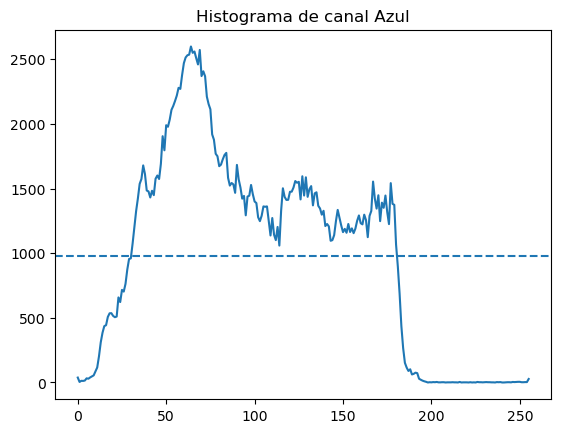

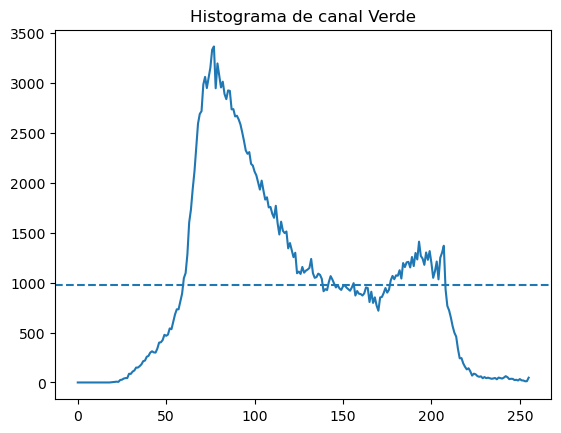

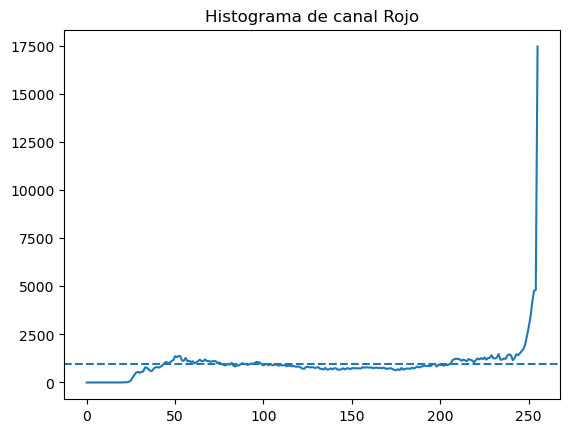

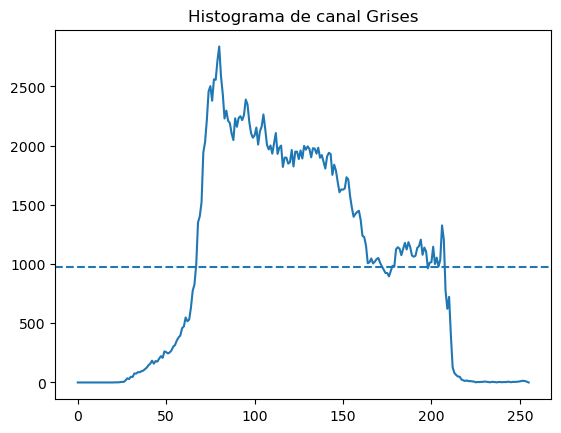

In [58]:
histogramas ("imagen.jpg")

### Problema 5

Escala de grises ponderada: distinto a la escala de grises de media aritmética, en ella se multiplica cada canal de RGB por un peso asignado, de acuerdo con la intensidad de cada uno. Usualmente se utiliza Avg = R*0.299 + G*0.587 +B*0.144; este fue el parámetro utilizado para el problema.

In [70]:
def ponderado (imagen):

    img = cv2.imread(imagen)
    canalB = img[:, :, 0]
    canalG = img[:, :, 1]
    canalR = img[:, :, 2]
    gris = np.uint8(canalR*0.299 + canalG*0.587 + canalB*0.144)
    
    histGRIS, bins=(np.histogram(gris, bins=256, range=(0, 256)))
    
    plt.figure()
    
    plt.plot(bins[:-1], histGRIS, color ='gray')
    plt.axhline(np.mean(histGRIS), color='gray', linestyle='--')
    plt.xlim([0, 256])
    plt.show()

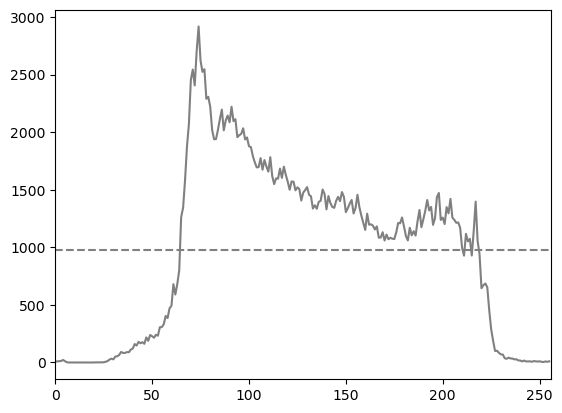

In [72]:
ponderado("imagen.jpg")

### Problema 6

# HSV (Hue, Saturation, Value) o matiz, saturación, valor

También llamado HSB, este espacio de color describe los colores de manera más similar a como las personas los percibimos. Describe los colores de acuerdo a su matiz o tono, su intensidad o saturación, y su brillo o valor. Suele representarse gráficamente por un cono o cilindro expresando estas dimensiones.
Cada uno de sus componentes, o canales, tiene los siguientes rangos:
Matiz 0-179, que representa, en grados (°):
Rojo: 0-60°
Amarillo: 61-120°
Verde: 121-180°
Cyan: 181-240°
Azul: 241-300°
Magenta: 301-360°

Saturación: 0-255
0-100% Define la cantidad de gris. A mayor porcentaje, menor cantidad de gris, es decir mayor intensidad del color. 
 
Valor: 0-255
0-100% Define la cantidad de brillo, con 0 siendo completamente negro y 100 siendo completamente blanco.